### K-Means Clustering

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

#### Loading Data into DataFrame

In [3]:
data = pd.read_csv("wine-clustering.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [7]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
X = data

### Scaling of Data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
x_scale = scaler.fit_transform(X)

In [12]:
x_scale_df = pd.DataFrame(x_scale,columns = X.columns)

In [13]:
x_scale_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


### Training the model

In [14]:
from sklearn.cluster import KMeans
kmean_model = KMeans(n_clusters = 5)

In [15]:
kmean_model.fit(x_scale_df)

KMeans(n_clusters=5)

In [16]:
y_var = kmean_model.fit_predict(x_scale_df)

In [17]:
y_var

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 4, 4, 2, 2,
       4, 4, 1, 4, 1, 2, 2, 0, 4, 4, 4, 1, 4, 2, 4, 4, 2, 1, 2, 4, 2, 2,
       2, 2, 2, 2, 1, 4, 4, 0, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3])

In [18]:
kmean_model.cluster_centers_

array([[ 0.90537676, -0.29781954,  0.29338792, -0.69473572,  0.55724067,
         0.89427402,  0.95416129, -0.60903111,  0.59829118,  0.19364983,
         0.47074532,  0.77709639,  1.1783867 ],
       [-0.12840741,  0.54067899, -0.09449125,  0.19069784, -0.17845233,
        -1.09670893, -1.19398717,  0.89022159, -1.14802196, -0.08756221,
        -0.64895805, -1.15540467, -0.46862986],
       [-1.02038636, -0.15214598,  0.42839657,  0.8217253 , -0.49742151,
        -0.04664765,  0.21644266,  0.33730261,  0.18414601, -0.91745802,
         0.37721958,  0.39027858, -0.82144144],
       [ 0.35223735,  0.96101551,  0.40638418,  0.74645606,  0.07755631,
        -0.8216831 , -1.15884833,  0.62968586, -0.41331468,  1.77985348,
        -1.48387986, -1.36810407, -0.31161799],
       [-0.8217734 , -0.65393968, -1.42982209, -0.4607061 , -0.43322645,
         0.11198317,  0.07423794, -0.67682984,  0.12294822, -0.82012977,
         0.60974853,  0.38301459, -0.66476435]])

### WCSS

WITHIN CLUSTER SUM OF SQUARE
wcss = kmeans_model.inertia_

In [33]:
wcss_list = []
for k in range(1,17):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(x_scale_df)
    wcss = kmeans_model.inertia_
    wcss_list.append(wcss)
    print(f"k == {k}, WCSS == {wcss}")

C:\Users\krishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k == 1, WCSS == 2313.9999999999986
k == 2, WCSS == 1658.7588524290961
k == 3, WCSS == 1278.7607763668154
k == 4, WCSS == 1180.1665831581074
k == 5, WCSS == 1115.953898942242
k == 6, WCSS == 1041.432040174349
k == 7, WCSS == 991.0073992874054
k == 8, WCSS == 956.4156936066361
k == 9, WCSS == 909.9240052491555
k == 10, WCSS == 854.4037058744273
k == 11, WCSS == 824.7517598302826
k == 12, WCSS == 791.7979954990949
k == 13, WCSS == 754.2571430420475
k == 14, WCSS == 742.6672877528543
k == 15, WCSS == 726.7482348177239
k == 16, WCSS == 709.6081173026854


In [22]:
import matplotlib.pyplot as plt

#### Plotting a graph between wcss and No of K

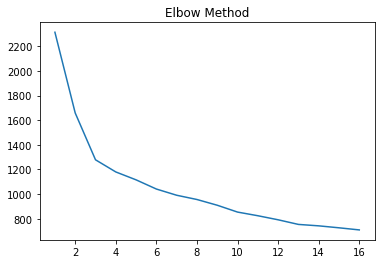

In [34]:
k = range(1,17)
plt.title('Elbow Method')
plt.plot(k,wcss_list)